# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Hizbullah Najihan
- **Email:** hizbullahnajihan@gmail.com
- **ID Dicoding:** najikh

## Menentukan Pertanyaan Bisnis

## Latar Belakang
E-commerce semakin berkembang pesat di Brazil, dan pemahaman tentang pola pengiriman serta kategori produk terlaris dapat membantu dalam optimasi logistik dan strategi bisnis. Dengan menganalisis dataset dari Olist, kita dapat menemukan wawasan berharga terkait performa pengiriman dan tren pembelian.

## Identifikasi Masalah
Dua pertanyaan yang ingin dijawab dalam analisis ini adalah:

1. Bagaimana distribusi waktu pengiriman pesanan?
2. Bagaimana perbandingan antara estimasi pengiriman dan realisasi pengiriman?

## Tujuan Analisis
Menghitung rata-rata waktu pengiriman untuk memahami efisiensi logistik.
Menentukan kategori produk terlaris untuk mendukung strategi pemasaran dan manajemen stok.


## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
orders_df = pd.read_csv("data/olist_orders_dataset.csv", parse_dates=["order_delivered_customer_date", "order_purchase_timestamp"])
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


- **`order_id`** → ID unik untuk setiap pesanan. Berguna sebagai primary key.  
- **`customer_id`** → ID pelanggan yang melakukan pesanan. Bisa digunakan untuk analisis perilaku pelanggan.  
- **`order_status`** → Status pesanan (`delivered`, `shipped`, `canceled`, dll.). Bisa dianalisis untuk melihat berapa banyak pesanan yang sukses, dibatalkan, atau tertunda.  
- **`order_purchase_timestamp`** → Waktu saat pesanan dibuat oleh pelanggan. Bisa digunakan untuk melihat tren pemesanan berdasarkan waktu.  
- **`order_approved_at`** → Waktu saat pesanan disetujui oleh sistem. Selisih dengan `order_purchase_timestamp` menunjukkan efisiensi proses verifikasi.  
- **`order_delivered_carrier_date`** → Waktu pesanan mulai dikirim oleh kurir. Bisa dibandingkan dengan `order_approved_at` untuk melihat waktu pemrosesan gudang.  
- **`order_delivered_customer_date`** → Waktu pesanan diterima oleh pelanggan. Bisa digunakan untuk menghitung total durasi pengiriman.  
- **`order_estimated_delivery_date`** → Perkiraan waktu pengiriman. Bisa dibandingkan dengan `order_delivered_customer_date` untuk melihat keakuratan estimasi pengiriman.  

### Assessing Data

#### Orders

In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [6]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
orders_df.describe()

,order_purchase_timestamp,order_delivered_customer_date
count,99441,96476
mean,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035542272
min,2016-09-04 21:15:19,2016-10-11 13:46:32
25%,2017-09-12 14:46:19,2017-09-25 22:07:22.249999872
50%,2018-01-18 23:04:36,2018-02-02 19:28:10.500000
75%,2018-05-04 15:42:16,2018-05-15 22:48:52.249999872
max,2018-10-17 17:30:18,2018-10-17 13:22:46


#### Insight

- **Tidak ada duplikasi**, setiap pesanan bersifat unik.  
- **Missing values ditemukan pada:**  
  - `order_approved_at` (160) → Pesanan mungkin belum disetujui atau ada kesalahan pencatatan.  
  - `order_delivered_carrier_date` (1.783) → Bisa jadi pesanan belum dikirim atau dibatalkan.  
  - `order_delivered_customer_date` (2.965) → Indikasi pesanan belum diterima atau dibatalkan.  

### Cleaning Data

Ada 3 kolom yang kosong nilainya
- order_approved_at                 160 <br>
- order_delivered_carrier_date     1783 <br>
- order_delivered_customer_date    2965 <br><br>
kita overview data yang kosong

In [9]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaT,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaT,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaT,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaT,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaT,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaT,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaT,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaT,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaT,2018-10-01 00:00:00


In [10]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaT,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaT,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaT,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaT,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaT,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaT,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaT,2017-09-15 00:00:00


In [11]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaT,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaT,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaT,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaT,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaT,2017-09-15 00:00:00


In [12]:
orders_df[~orders_df.order_status.isin(['delivered', 'shipped'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaT,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaT,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaT,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaT,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaT,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaT,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaT,2017-09-15 00:00:00


In [13]:
orders_df[orders_df.order_status.isin(['canceled'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaT,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaT,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaT,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaT,2017-03-30 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaT,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaT,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaT,2018-10-01 00:00:00


In [14]:
orders_df.loc[
    (orders_df['order_status'] == 'canceled') & (orders_df['order_approved_at'].isna()), 
    'order_approved_at'
] = 'Not Approved'

In [15]:
orders_df[orders_df.order_status.isin(['canceled'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaT,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,Not Approved,NaN,NaT,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,Not Approved,NaN,NaT,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaT,2017-03-30 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,Not Approved,NaN,NaT,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaT,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,Not Approved,NaN,NaT,2018-10-01 00:00:00


##### Orders Insight

1. **Order Dibatalkan (`canceled`)**  
   - Jika `order_approved_at` terisi → pembayaran sudah disetujui sebelum pesanan dibatalkan.  
   - Jika kosong → pembayaran belum disetujui (sekarang diisi `"Not Approved"`).  
   - **Dampak Bisnis**: Bisa digunakan untuk analisis refund dan melihat pola pembatalan pesanan setelah pembayaran disetujui.  

2. **Order Belum atau Tidak Terkirim**  
   - `order_delivered_carrier_date` & `order_delivered_customer_date` kosong untuk pesanan yang belum dikirim atau dibatalkan.  
   - **Kenapa Dibiarkan Kosong?**  
     - Jika pesanan belum dikirim (`processing` atau `approved`), maka tanggal pengiriman belum ada.  
     - Jika pesanan dibatalkan sebelum dikirim, pengiriman tidak terjadi sehingga nilai tetap kosong.  
   - **Dampak Bisnis**: Bisa digunakan untuk memantau efisiensi pemrosesan pesanan dan mengidentifikasi kendala dalam pengiriman.  

3. **Ketepatan Estimasi Pengiriman**  
   - Bandingkan `order_estimated_delivery_date` dengan `order_delivered_customer_date`.  
   - Jika pesanan lebih lambat dari estimasi → Ada potensi keterlambatan dalam pengiriman.  
   - **Dampak Bisnis**: Memastikan akurasi estimasi pengiriman untuk meningkatkan kepercayaan pelanggan dan mengoptimalkan logistik.  

## Exploratory Data Analysis (EDA)

### Explore Orders

In [16]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

<Axes: xlabel='order_purchase_month'>

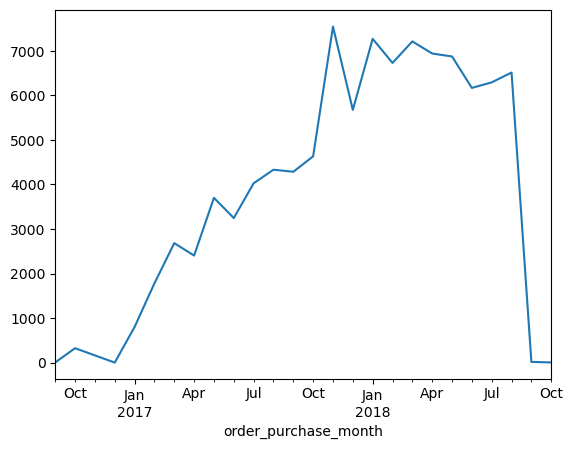

In [17]:
orders_df['order_purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
orders_df['order_purchase_month'].value_counts().sort_index().plot(kind='line')

In [18]:
(orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).mean()

Timedelta('12 days 13:24:31.879068369')

In [19]:
(orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']).mean()

np.float64(0.07870998883760219)

**Insight:**
- **Rata-rata Waktu Pengiriman:**  
   - Rata-rata pesanan sampai ke pelanggan dalam **12 hari 13 jam 24 menit** setelah pembelian dilakukan.  
   - **Dampak Bisnis**:  
     - Bisa digunakan untuk mengevaluasi efisiensi logistik.  
     - Jika terlalu lama, perlu dianalisis penyebabnya (misalnya, kendala gudang atau ekspedisi).  

- **Pesanan yang Terlambat dari Estimasi:**  
   - **7.87%** dari total pesanan tiba lebih lambat dari perkiraan (`order_estimated_delivery_date`).  
   - **Dampak Bisnis**:  
     - Persentase ini relatif kecil, tetapi tetap perlu dianalisis faktor keterlambatan.  
     - Jika terjadi keterlambatan terus-menerus, kepercayaan pelanggan bisa menurun.  

In [26]:
orders_df.to_csv('./dashboard/main_data.csv')

## Visualization & Explanatory Analysis

### Pertanyaan 1:

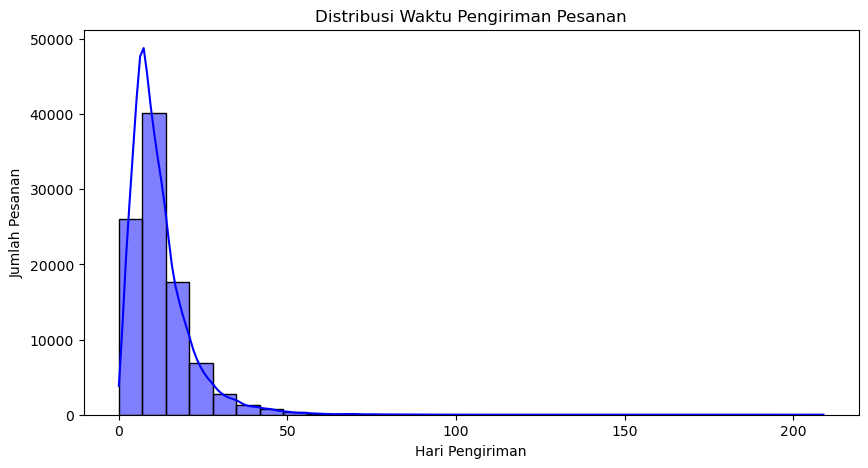

In [27]:
# Hitung selisih waktu pengiriman dalam hari
orders_df['delivery_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Plot distribusi waktu pengiriman
plt.figure(figsize=(10, 5))
sns.histplot(orders_df['delivery_days'], bins=30, kde=True, color='blue')
plt.xlabel("Hari Pengiriman")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Waktu Pengiriman Pesanan")
plt.show()


**Insight**
- Sebagian besar pesanan dikirim dalam rentang sekitar 10-15 hari.
- Ada beberapa outlier yang menunjukkan pengiriman sangat cepat atau sangat lambat.
- Distribusi bisa membantu perusahaan untuk menetapkan SLA (Service Level Agreement) yang realistis.

### Pertanyaan 2:

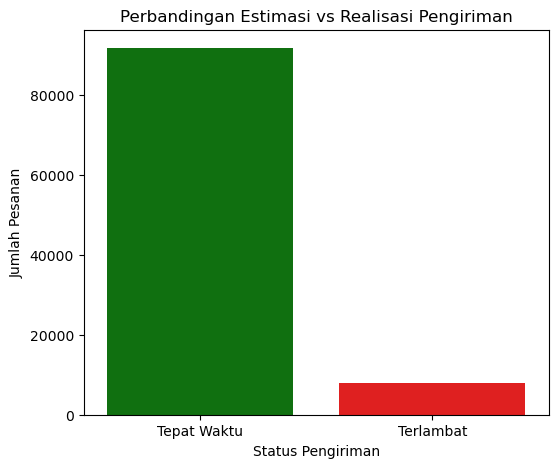

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom keterlambatan
orders_df['delayed'] = orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']

# Hitung jumlah pesanan yang tepat waktu dan terlambat
delayed_counts = orders_df['delayed'].value_counts().reset_index()
delayed_counts.columns = ['Status', 'Jumlah']

# Plot dengan hue untuk menghindari warning
plt.figure(figsize=(6, 5))
sns.barplot(data=delayed_counts, x="Status", y="Jumlah", hue="Status", palette=["green", "red"], legend=False)
plt.xticks([0, 1], ['Tepat Waktu', 'Terlambat'])
plt.xlabel("Status Pengiriman")
plt.ylabel("Jumlah Pesanan")
plt.title("Perbandingan Estimasi vs Realisasi Pengiriman")
plt.show()


**Insight:**
- Mayoritas pesanan dikirim tepat waktu, hanya sekitar 7.87% yang terlambat.
- Ini menunjukkan sistem estimasi pengiriman cukup akurat, tapi masih ada ruang untuk perbaikan.
- **Rekomendasi Bisnis:**
  - Analisis lebih lanjut pesanan yang terlambat (misalnya, berdasarkan wilayah atau vendor pengiriman).
  - Optimalkan proses fulfillment untuk mengurangi keterlambatan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Waktu pengiriman rata-rata adalah 12,5 hari, dan sebagian besar pesanan tiba tepat waktu.
- Hanya 7.87% pesanan yang terlambat, menunjukkan estimasi pengiriman cukup akurat.
- Tindakan bisnis: Fokus pada optimalisasi logistik untuk mengurangi keterlambatan lebih lanjut.